In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
import os
from matplotlib.lines import Line2D
import matplotlib.patches as mpatches

fp_databse = "data/manually_selected_full_study_all_temps.csv"
database = pd.read_csv(fp_databse)

folder_figures = 'figures'



AVERAGED STDEV:  0.26200200848031496


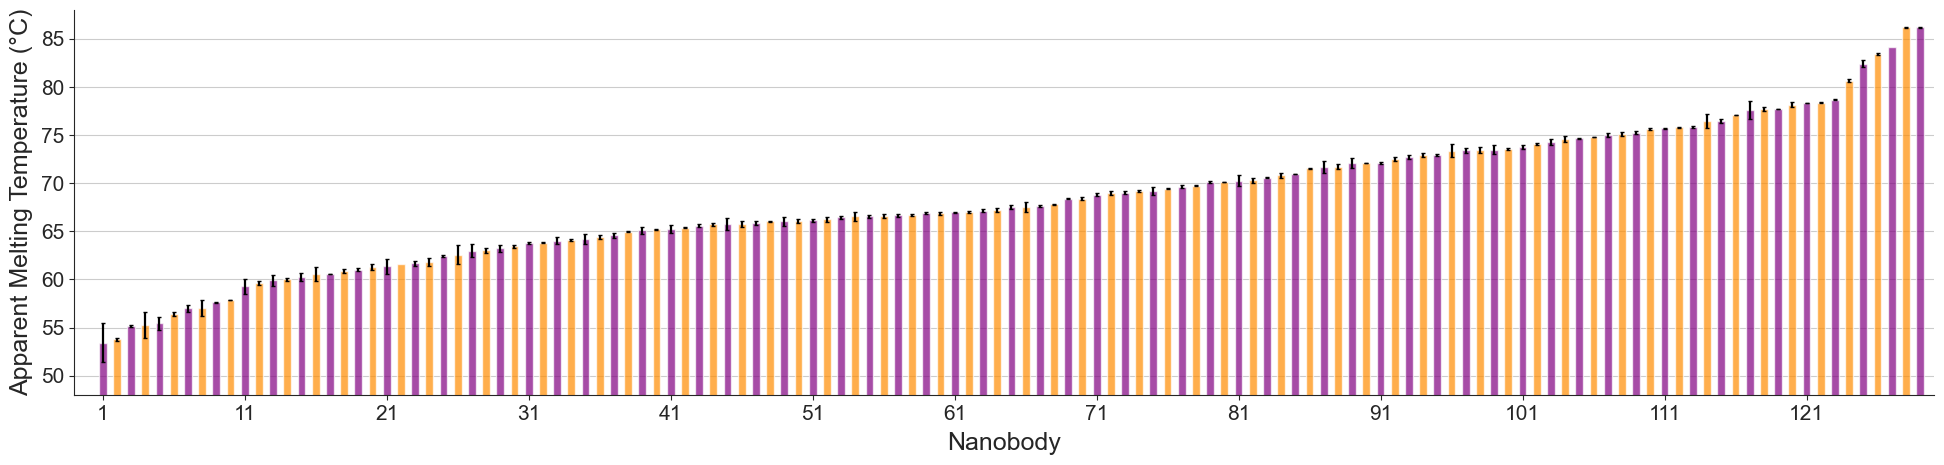

In [3]:
# PLot measured Tms 
database = database.sort_values(by=['Avg Tm'])
tms = database['Avg Tm']
ids = database['Name']
stds = database['Std Tm']

print('AVERAGED STDEV: ', np.mean(stds))

sns.set_style('white', {'axes.spines.right':False, 'axes.spines.top': False,
                    'xtick.bottom': True, 'ytick.left': True})
plt.figure(figsize=(24,5))

plt.bar(range(1, len(tms)+1), tms, yerr=stds, width=0.55, 
        color=['purple' if i % 2 == 0 else 'darkorange' for i in range(len(tms))], 
        alpha=0.7, error_kw={'elinewidth':1.6}, capsize=1.6)

plt.xlabel(f"Nanobody", fontsize=18, labelpad=6)
plt.ylabel(f"Apparent Melting Temperature (°C)", fontsize=18, labelpad=6)
plt.tick_params(bottom=True, left=True, labelsize=15)
plt.grid(axis='y')
plt.xlim(-1,130)
plt.ylim(48,88)
plt.xticks(ticks=np.arange(1, len(tms)+1,10))
plt.savefig(os.path.join(folder_figures, 'figure2b.png'), dpi=800, bbox_inches='tight', transparent=True)
plt.show()
plt.close()


dict_keys(['parameters_fitted', 'parameters_standard_errors', 'sum_of_squared_residuals', 'chi2red', 'R2', 'label', 'x_fit_data', 'y_fit_data', 'ratio_fluo_trace', 'T_list', 't_steepest_derv', 'prome_tm', '350_fluo_trace', 'corrected_350_fluo_trace', 'x_350_fit_data', 'y_350_fit_data', 'Tm_single_350_fitting', 't_steepest_derv_350', '330_fluo_trace', 'corrected_330_fluo_trace', 'x_330_fit_data', 'y_330_fit_data', 'Tm_single_330_fitting', 't_steepest_derv_330'])
dict_keys(['parameters_fitted', 'parameters_standard_errors', 'sum_of_squared_residuals', 'chi2red', 'R2', 'label', 'x_fit_data', 'y_fit_data', 'ratio_fluo_trace', 'T_list', 't_steepest_derv', 'prome_tm', '350_fluo_trace', 'corrected_350_fluo_trace', 'x_350_fit_data', 'y_350_fit_data', 'Tm_single_350_fitting', 't_steepest_derv_350', '330_fluo_trace', 'corrected_330_fluo_trace', 'x_330_fit_data', 'y_330_fit_data', 'Tm_single_330_fitting', 't_steepest_derv_330'])
dict_keys(['parameters_fitted', 'parameters_standard_errors', 'sum_o

/var/folders/hr/1j50v5r91sv8fs_r8qhx8bym0000gn/T/ipykernel_11169/367996660.py:62: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  handles = [mpatches.Patch(color=palette[k], label=nice_labels[k], alpha=1, edgecolor='black') for k in range(len(list_nabs_to_plot))]


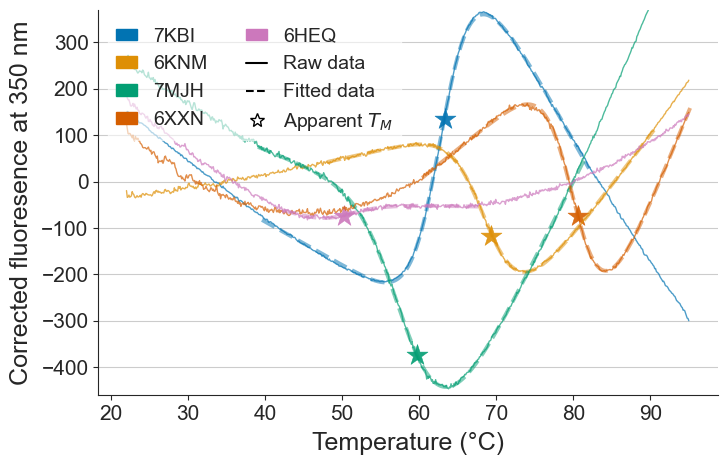

In [6]:
fp_fiited_dict = 'data/nanomelt_fitted_results.pkl'

with open(fp_fiited_dict, 'rb') as handle:
    fit_results = pickle.load(handle)

list_nabs_to_plot = ['74 7KBI', '55 6KNM', '75 7MJH', '69 6XXN', '50 6HEQ']
nice_labels = ['7KBI', '6KNM', '7MJH', '6XXN', '6HEQ']



#Gathering all the assays
dicto, dict_for_csv = dict(), dict()

for dict_results in fit_results:
    # Combine the duplicates
    key = dict_results['label']

    if key not in dicto:
        dicto[key]=[dict_results]
    else:
        dicto[key].append(dict_results)


# PLOT CURVES
sns.set_style('white', {'axes.spines.right':False, 'axes.spines.top': False,
                'xtick.bottom': True, 'ytick.left': True})
fig, ax = plt.subplots()
fig.set_size_inches(8,5)


for k, key in enumerate(list_nabs_to_plot):
    
    dict_dupli1 = dicto[key][0]
    
    label = 'Corrected 350nm'
    nab = key
    palette = sns.color_palette("colorblind")

    T_list = dict_dupli1['T_list']
    if label == 'Corrected 350nm':
        print(dict_dupli1.keys())
        ratio_list = dict_dupli1['corrected_350_fluo_trace']
        fit_ratio_tm = dict_dupli1['Tm_single_350_fitting']
        steepest_tm = dict_dupli1['t_steepest_derv_350']
        x_350_fit_datas = dict_dupli1['x_350_fit_data']
        y_350_fit_datas = dict_dupli1['y_350_fit_data']

        ax.set_xlabel('Temperature (°C)', fontsize=12)
        ax.set_ylabel('Corrected fluoresence at 350 nm', fontsize=12)
        
    
        ax.plot(T_list,ratio_list,linewidth = 1, alpha=0.7,color=palette[k],label=nab)
        ax.plot(x_350_fit_datas,y_350_fit_datas,linewidth = 2.8,  alpha=0.5,linestyle='dashed',color=palette[k])

        
        #Find the fluo of the nearest T of Tm
        posi, value = min(enumerate(T_list), key=lambda x: abs(x[1]-fit_ratio_tm))
        fluo_at_Tm = ratio_list[posi]
        
        ax.scatter(fit_ratio_tm,fluo_at_Tm,marker='*', s=250,linewidth=.4,alpha=0.9, color=palette[k])
        
handles = [mpatches.Patch(color=palette[k], label=nice_labels[k], alpha=1, edgecolor='black') for k in range(len(list_nabs_to_plot))]

handles.extend([
            Line2D([0], [0], color='black', linestyle='-', label='Raw data'),
            Line2D([0], [0], color='black', linestyle='--', label='Fitted data'),
            Line2D([0], [0], marker='*', color='w', markeredgecolor='black', markerfacecolor='white', markersize=7, label='Apparent ' +'$T_{M}$')
            ])
legend = ax.legend(handles=handles, framealpha=0.6,
                    loc='upper left',frameon=True, markerscale=1.5, fontsize=14,ncol=2, edgecolor = 'w', handlelength=1.1, handleheight=0.55)
# legend._legend_box.sep = 10

    
plt.ylabel(f"Corrected fluoresence at 350 nm", fontsize=18, labelpad=6)
plt.xlabel(f"Temperature (°C)", fontsize=18, labelpad=6)
plt.tick_params(bottom=True, left=True, labelsize=15)
plt.grid(axis='y')
plt.ylim(-460,370)
plt.savefig(os.path.join(folder_figures, 'figureS3.png'), dpi=800, bbox_inches='tight', transparent=True)
plt.show()
plt.close()
